# Varables :
<br>Here's a brief version of what you'll find in the data description file.:
<br> **SalePrice** </br> : the property's sale price in dollars. This is the target variable that you're trying to predict.:
<br>**MSZoning**: Identifies the general zoning classification of the sale.
<br>**GrLivArea**: Above grade (ground) living area square feet.
<br>**Utilities**: Type of utilities available.
<br>**OverallQual**: Rates the overall material and finish of the house.
<br>**YearBuilt**: Original construction date.
<br>**TotalBsmtSF**: Total square feet of basement area.
<br>**Heating**: Type of heating.
<br>**HeatingQC**: Heating quality and condition.
<br>**CentralAir**: Central air conditioning.
<br>**FullBath**: Full bathrooms above grade.
<br>**BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
<br>**KitchenAbvGr**: Kitchens above grade
<br>**GarageCars**: Size of garage in car capacity.
<br>**PoolArea**: Pool area in square feet.


In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#used in correlation
import scipy.stats as ss
import numpy as np
import itertools

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV


## 1- Import data

Load the csv file with our data into a pandas Dataframe

In [2]:
data = pd.read_csv('data/train_custom.csv')
print("Number of houses in our Dataset : ", data.shape[0])
print("Number of features : ", data.shape[1]-1)#the -1 is for not counting the Target SalePrice

Number of houses in our Dataset :  1459
Number of features :  14


Let's have a quick look on our data

In [3]:
data.head(10)

,MSZoning,GrLivArea,Utilities,OverallQual,YearBuilt,TotalBsmtSF,Heating,HeatingQC,CentralAir,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea,SalePrice
0,RL,1710,AllPub,7,2003,856,GasA,Ex,Y,2,3,1,2,0,208500
1,RL,1262,AllPub,6,1976,1262,GasA,Ex,Y,2,3,1,2,0,181500
2,RL,1786,AllPub,7,2001,920,GasA,Ex,Y,2,3,1,2,0,223500
3,RL,1717,AllPub,7,1915,756,GasA,Gd,Y,1,3,1,3,0,140000
4,RL,2198,AllPub,8,2000,1145,GasA,Ex,Y,2,4,1,3,0,250000
5,RL,1362,AllPub,5,1993,796,GasA,Ex,Y,1,1,1,2,0,143000
6,RL,1694,AllPub,8,2004,1686,GasA,Ex,Y,2,3,1,2,0,307000
7,RL,2090,AllPub,7,1973,1107,GasA,Ex,Y,2,3,1,2,0,200000
8,RM,1774,AllPub,7,1931,952,GasA,Gd,Y,2,2,2,2,0,129900
9,RL,1077,AllPub,5,1939,991,GasA,Ex,Y,1,2,2,1,0,118000


## 2- Some data exploration

The next step is to gather some information about different column in the DataFrame. You can do so by using **.info()**, which basically gives you information about the number of rows, columns, column data types and memory usage.

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1459 non-null   object
 1   GrLivArea     1459 non-null   int64 
 2   Utilities     1459 non-null   object
 3   OverallQual   1459 non-null   int64 
 4   YearBuilt     1459 non-null   int64 
 5   TotalBsmtSF   1459 non-null   object
 6   Heating       1459 non-null   object
 7   HeatingQC     1379 non-null   object
 8   CentralAir    1459 non-null   object
 9   FullBath      1459 non-null   int64 
 10  BedroomAbvGr  1459 non-null   int64 
 11  KitchenAbvGr  1459 non-null   int64 
 12  GarageCars    1459 non-null   int64 
 13  PoolArea      1459 non-null   int64 
 14  SalePrice     1459 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 171.1+ KB
None


As you can see, Dtype column indicates the type of the variable as it is read by pandas.
Columns like GrLivArea, YearBuilt and TotalBsmtSF are read as **integers**, others like MSZoning, Heating are **object**.
<br>
The columns with object dtype are the **possible** categorical features in the dataset because they are most likely to contain strings.
<br>
The reason why you would say that these categorical features are **'possible'** is because you shouldn't completely rely on **.info()** to get the real data type of the values of a feature, as some missing values that are represented as strings in a continuous feature can coerce it to read them as object dtypes. And also because some categorical features can be encoded as integers.<br><br>
We can see for example that the feature TotalBmtSF is recognized as an "object", we can think of it as a catogorical feature, but we know that TotalBmtSF is the Total square feet of basement area, so it should be a continious feature. And the reason why it figure out as object type is because maybe it contains some missing values. <br>We can also see that all features have 1459 non-null count, except HeatingQC that contains 80 null entries. 
<br>Missing values will be dealt later on this notebook.

### 2.1 - Let's take a look at the distribution of our target SalePrice

In [5]:
data['SalePrice'].describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<img src="images/saleprice_describe.png" style="width:80%;height:80%;">

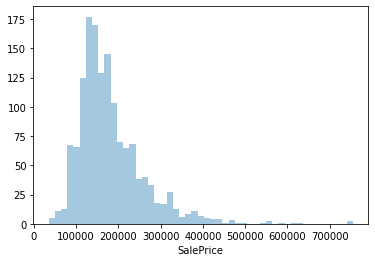

In [6]:
sns.distplot(data['SalePrice'], hist=True, kde=False)
# kde : kernel density estimation, if True allows to plot a gaussian kernel density estimate.

### 2.2- Let's explore features/variables

As you know, there are two types of features :<br>
- Continious (or quantitative)
- Catogorical (or qualitative)

**Continious data** is data which can take an infinite number of possible values; between two different values we can have a new value.<br> Attributes such as cost, price, quantity are typically continious (integers or floats).<br><br>
**Categorical data** is data which takes on a finite number of possible values. 
<br>2 types of catergorical features : Ordinal (with order) and nominal. For example, if we are talking about a physical product like a t-shirt, it could have categorical variables such as:
- Size (X-Small, Small, Medium, Large, X-Large), where XS < S < M <L ==> Ordinal type
- Color (Red, Black, White), no order between theses types ==> nominal type

**The key take away** is that whether or not a variable is categorical depends on its application. Since we only have 3 colors of shirts, then that is a good categorical variable. However, “color” could represent thousands of values in other situations so it would not be a good choice.<br> *So there is no hard and fast rule for how many values a categorical value should have. You should apply your domain knowledge to make that determination on your own data sets.*

#### In the house price dataset, there are the two types of features
We based on the panel values of these features in the dataset, and also on some domain knowledge to decide whether a feature is continious or categorical:

<img src='images/feature_type.png' style="width:40%;height:40%;">

### 2.2.1- First, let's focus on continious features

**GrLivArea** is the above ground living area in square feet : we can see in the first graph below the distribution of GrLivArea and in the second graph the relationship between the GrLivArea and SalePrice.
<br>Notice that houses tend to be more expensive as the area increase, and the relationship between the area and the price seems to be linear.

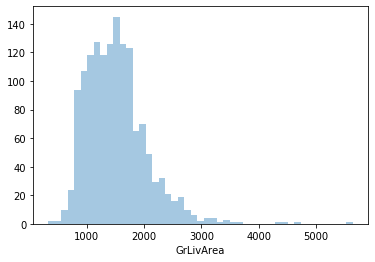

In [7]:
sns.distplot(data['GrLivArea'], hist=True, kde=False)

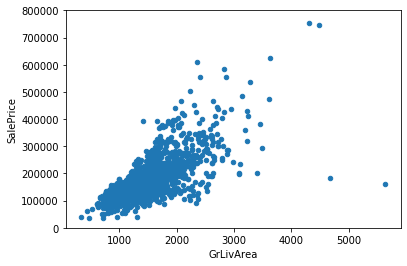

In [8]:
#scatter plot grlivarea/saleprice
#GrLivArea: Above grade (ground) living area square feet.
var = 'GrLivArea'
data_ = pd.concat([data['SalePrice'], data[var]], axis=1)
data_.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

As seen before, **TotalBmstSF** values has object type while it should have float type. <br>
We try in the below cell to convert the type of the column, but got an **error**. This confirms that there are some unexpected strings in the data (You can uncomment the cell to see the error if you want):

In [9]:
#data['TotalBsmtSF'].astype('float')

By displaying the content of TotalBsmtSF column, and looking at some values, we can see that the first value is a string "whitespace":

In [10]:
set(data['TotalBsmtSF'])

{' ',
 '0',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1010',
 '1012',
 '1013',
 '1017',
 '1019',
 '1020',
 '1021',
 '1022',
 '1024',
 '1026',
 '1028',
 '1029',
 '1030',
 '1032',
 '1034',
 '1039',
 '1040',
 '1041',
 '1042',
 '1048',
 '105',
 '1050',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1060',
 '1062',
 '1063',
 '1064',
 '1065',
 '1067',
 '1069',
 '1070',
 '1073',
 '1074',
 '1075',
 '1078',
 '1079',
 '1080',
 '1082',
 '1084',
 '1085',
 '1086',
 '1088',
 '1090',
 '1092',
 '1094',
 '1095',
 '1096',
 '1097',
 '1098',
 '1099',
 '1100',
 '1103',
 '1104',
 '1105',
 '1106',
 '1107',
 '1108',
 '1109',
 '1112',
 '1113',
 '1114',
 '1117',
 '1120',
 '1121',
 '1122',
 '1125',
 '1126',
 '1127',
 '1128',
 '1132',
 '1134',
 '1136',
 '1138',
 '1140',
 '1141',
 '1142',
 '1143',
 '1144',
 '1145',
 '1148',
 '1149',
 '1150',
 '1151',
 '1152',
 '1153',
 '1154',
 '1156',
 '1157',
 '1158',
 '1161',
 '1162',
 '1163',
 '1164',
 '1165',

How many times does the whitespace string occur in TotalBsmtSF columns ?

In [11]:
print("There are ", len(data[data["TotalBsmtSF"]==' ']) , " entries having whitespace in their TotalBsmtSF")

There are  50  entries having whitespace in their TotalBsmtSF


These 50 entries are missing values, we can choose to delete them from our dataset (delete rows or the column). But if at each time there are some mising values in some column, we choose to delete the row or column, we may end up with only few rows and columns in our dataset. 
<br> There are multiple ways to deal with missing values. 
<br>Before choosing which strategy is the most appropriate, we should try to find out if a missing value has a specific meaning depending on the context. 
<br> In the context of TotalBsmtSF, this column contain the area of the basement if there is a basement. If there is no basement in the house, this value is put on 0. 
<br> So maybe the most appropriate way to deal with missing values TotalBsmtSF, is to consider these houses as house without a basement, and replace the whitespace values by zero. 
<br><br> 
There are many techniques to fill missing values (using the mean or the k-nearest neighbours for example). It depends on the context and the domain knowledge. 
<br>*note: if you have to deal with missing values when working with client data, you should validate the filling strategy with your client*<br><br>
Here is a link if you want to learn more about working with missing values: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
<br>
<br>
So we replace the whitespace string by 0, and we can now convert the column type to float:

In [12]:
data['TotalBsmtSF'] = data['TotalBsmtSF'].replace(' ', 0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].astype('float')

The distribution of the TotalBsmtSF looks pretty similar to the GrLivArea one

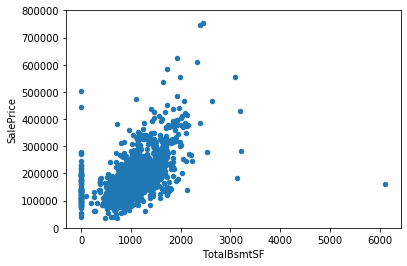

In [13]:
#scatter plot TotalBsmtSF/saleprice
#TotalBsmtSF: Total square feet of basement area.
var = 'TotalBsmtSF'
data_ = pd.concat([data['SalePrice'], data[var]], axis=1)
data_.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

let's look if there are some dependencies between the SalePrice, and the Year of built, the number of bathroom or bedroom

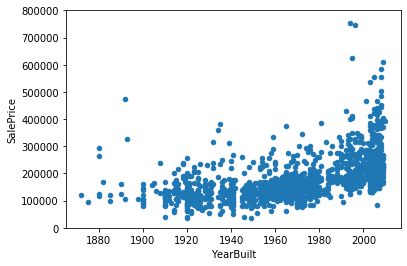

In [14]:
#scatter plot YearBuilt/saleprice
#YearBuilt: Original construction date.
var = 'YearBuilt'
data_ = pd.concat([data['SalePrice'], data[var]], axis=1)
data_.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

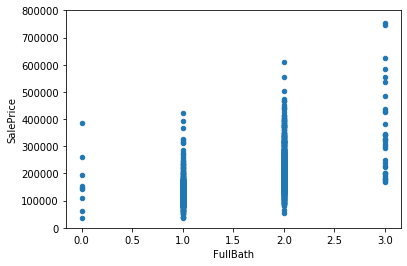

In [15]:
#scatter plot FullBath/saleprice
#FullBath: Full bathrooms above grade.   
var = 'FullBath'
data_ = pd.concat([data['SalePrice'], data[var]], axis=1)
data_.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

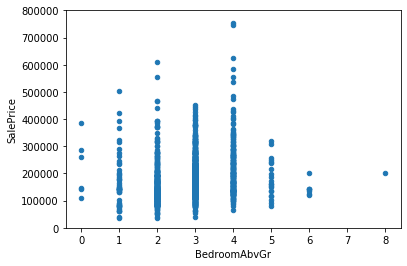

In [16]:
#scatter plot BedroomAbvGr/saleprice
#BedroomAbvGr:  Bedrooms above grade (does NOT include basement bedrooms)
var = 'BedroomAbvGr'
data_ = pd.concat([data['SalePrice'], data[var]], axis=1)
data_.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

 ### What about correlation between continious features ?

The most basic idea of correlation is "as one variable increases, does the other variable increase (positive correlation), decrease (negative correlation), or stay the same (no correlation)" with a scale such that perfect positive correlation is +1, no correlation is 0, and perfect negative correlation is -1. <br>
Just like the month-of-the-year is correlated with the average daily temperature, and the hour-of-the-day is correlated with the amount of light outdoors. <br>
The most commonly used mathematical defintion of correlation between continious features is **Pearson's R** which result in a range of [-1,1]
<img src="images/pearson_correlation.png" style="width:400px;height:90px;">
<br>Pearson's R works well for calculation correlation between two continious features, we'll se later an alternative for the correlation between categorical features

In [17]:
cont_features= ["GrLivArea","TotalBsmtSF","YearBuilt","FullBath","BedroomAbvGr","KitchenAbvGr","GarageCars","PoolArea"]
data[cont_features].head()

,GrLivArea,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,KitchenAbvGr,GarageCars,PoolArea
0,1710,856.0,2003,2,3,1,2,0
1,1262,1262.0,1976,2,3,1,2,0
2,1786,920.0,2001,2,3,1,2,0
3,1717,756.0,1915,1,3,1,3,0
4,2198,1145.0,2000,2,4,1,3,0


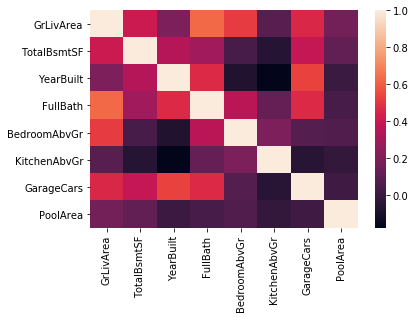

In [18]:
corr = data[cont_features].corr()#by default pearson
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Build our model using continious features only

Before introducing Categorical features, why not trying to fit a linear model only on continious features and see if we can get good prediction only based them?<br>
Using the 8 continious features : GrLivArea , TotalBsmtSF, YearBuilt, FullBath, BedroomAbvGr, KitchenAbvGr, GarageCars, PoolArea 

- First, we are going to split our dataset in train set (using to train the model) and test set(using to evaluate the model).
- Then we are going to re-scale the data, in order to have the same scale of values on all features.(cf. Feature scaling below)
- Then, we train a linear regression model based on training set to set parameters of the model((theta1, theta2, ..., thetaN) on their most optimal values. The training of the model will occur through multiple iterations, where each iteration aims to update the parameters in order to reduce a certain error. In our example, we use the LinearRegression function from Scikit-learn package, which uses the Mean squared error **(mse)** as an error calculation.
- Finally, we'll test the trained model on test set and evaluate the results.(we'll also evaluate results on training set, to try to find if there is some overfitting (when model performs very well on training data and very bad on testing data)).
<br><br><br>
<img src='images/linear_reg.jpg' style="width:30%;height:30%;">
<img src='images/h.png' style="width:30%;height:30%;">
<br>
<br>

**Feature scaling**
<br>Features do usually not have the same range of values. In our example, the feature GrLivArea has values between [334,5642] while FullBath feature range from 0 to 3, and sometimes the gap can be much greater for example when one of the features represents a price where we find much more zeros. (100000 ..)
<br>The difference in scale may not be liked by the algorithme, where he will spend more time to find his optimal solution (especially when using gradient descent!).
<br>So feature scaling consists on putting all the features and even the target at the same scale before training the model. 

<img src='images/scaling.png'>

One of the methods to scale data is to use the Standard scaler which perform this transformation on each feature:
<img src='images/standardscaler.jpg'>

In [19]:
#Get data with continious features only
X_continious = data[cont_features]
y=data['SalePrice']

#Split data on training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_continious, y, test_size=0.33, random_state=42)

#Scale the data using the standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

#train data
reg = LinearRegression().fit(X_train_scaled, y_train)

#evaluate on training data
y_pred_train = reg.predict(X_train_scaled)
print("Mean squared error on Training data : ", np.sqrt(mse(y_pred_train, y_train)))


Mean squared error on Training data :  40080.96232086125


In [20]:
y_pred_test = reg.predict(scaler.transform(X_test))
print("Mean squared error on Training data : ", np.sqrt(mse(y_pred_test, y_test)))

Mean squared error on Training data :  49514.2267008846


Model perfoms better on training set which is not a surprise while it was trained to fit the training data. 
<br>The MSE for test data is not so bad comparing to training data even if there is some overfitting. 
<br>If we compare the prediction using the model compared to a lazy prediction which will simply take the mean of the salePrice, we can see that even with a limited number of features we can get model results 2 times better. 

In [21]:
print("mse with basic mean : ", np.sqrt(mse(pd.Series((np.full(len(y_test), y_test.mean()))), y_test)))

mse with basic mean :  86822.79636673273


### 2.2.2- Categorical features

Previously, we put the focus on continious features only. We explored values of continious data and build a model based on 8 continious features. Now, let's consider the categorical features and add them to our model. 
<br> First, same as we did for continous features, we'll de some data exploration on categorical values
<br> Then, we'll add categorical feature to our model, and see if it improve the prediction.

Boxplot is one of the likely useful vizualisation of categorical values
<img src='images/boxplot.png' style="width:60%;height:60%;">

**Extremely low values** are considered as outliers, in that case the minimum of the box plot is set on Q1-1.5*IQR*<br>
**Extremely hign values** are considerd as outliers, in that case the maximum of the box plot is set on Q3+1.5*IQR*

**MSZoning** identifies the general zoning classification of the sale. 
- A	    :Agriculture
- C(all):Commercial
- FV	:Floating Village Residential
- I	    :Industrial
- RH	:Residential High Density
- RL	:Residential Low Density
- RP	:Residential Low Density Park 
- RM	:Residential Medium Density

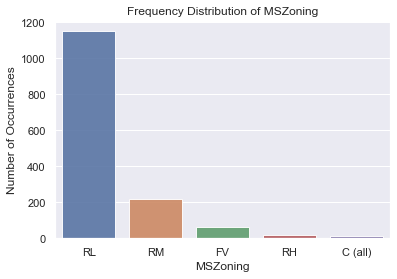

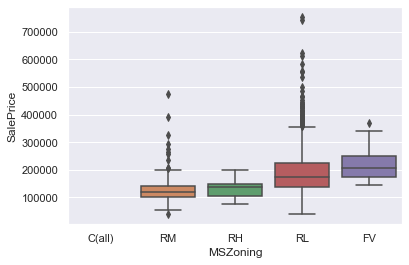

In [22]:
mszoning_count = data['MSZoning'].value_counts()
sns.set(style="darkgrid")
sns.barplot(mszoning_count.index, mszoning_count.values, alpha=0.9)
plt.title('Frequency Distribution of MSZoning')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('MSZoning', fontsize=12)
plt.show()
sns.boxplot(x='MSZoning', y='SalePrice', data=data, order=["C(all)",'RM', "RH","RL","FV"])

**Utilities**: Type of utilities available
- AllPub	: All public Utilities (E,G,W,& S)	
- NoSewr	: Electricity, Gas, and Water (Septic Tank)
- NoSeWa	: Electricity and Gas Only
- ELO	: Electricity only

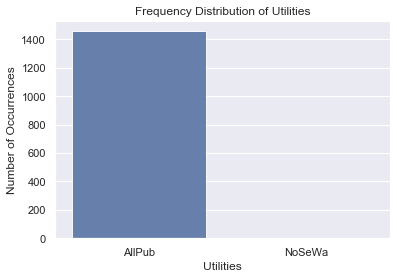

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
utilities_count = data['Utilities'].value_counts()
sns.set(style="darkgrid")
sns.barplot(utilities_count.index, utilities_count.values, alpha=0.9)
plt.title('Frequency Distribution of Utilities')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Utilities', fontsize=12)
plt.show()
data['Utilities'].value_counts()

**HeatingQC**: Heating quality and condition
- Ex	: Excellent
- Gd	: Good
- TA	: Average/Typical
- Fa	: Fair
- Po	: Poor

We saw at the begining of the notebook, that HeatingQC has 80 null values. In this case we choose to fill missing values using the most occured values which is Ex (Excellent)

In [24]:
data['HeatingQC'].value_counts()

Ex    702
TA    400
Gd    228
Fa     48
Po      1
Name: HeatingQC, dtype: int64

In [25]:
data['HeatingQC'] = data['HeatingQC'].fillna("Ex")

In [26]:
data['HeatingQC'].value_counts()

Ex    782
TA    400
Gd    228
Fa     48
Po      1
Name: HeatingQC, dtype: int64

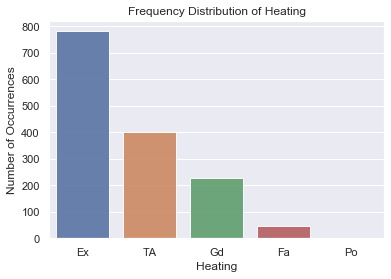

In [27]:
heating_count = data['HeatingQC'].value_counts()
sns.set(style="darkgrid")
sns.barplot(heating_count.index, heating_count.values, alpha=0.9)
plt.title('Frequency Distribution of Heating')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Heating', fontsize=12)
plt.show()

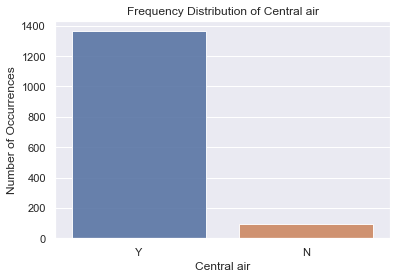

In [28]:
centralair_count = data['CentralAir'].value_counts()
sns.set(style="darkgrid")
sns.barplot(centralair_count.index, centralair_count.values, alpha=0.9)
plt.title('Frequency Distribution of Central air')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Central air', fontsize=12)
plt.show()

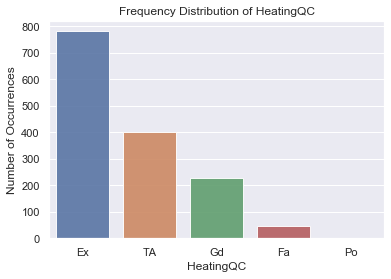

In [29]:
heatingqc_count = data['HeatingQC'].value_counts()
sns.set(style="darkgrid")
sns.barplot(heatingqc_count.index, heatingqc_count.values, alpha=0.9)
plt.title('Frequency Distribution of HeatingQC')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HeatingQC', fontsize=12)
plt.show()

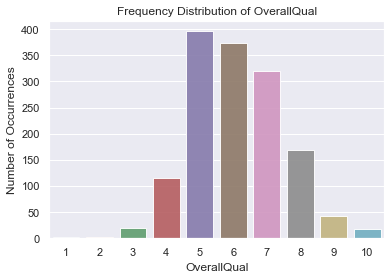

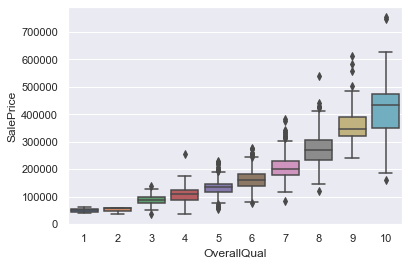

In [30]:
OverallQual_count = data['OverallQual'].value_counts()
sns.set(style="darkgrid")
sns.barplot(OverallQual_count.index, OverallQual_count.values, alpha=0.9)
plt.title('Frequency Distribution of OverallQual')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('OverallQual', fontsize=12)
plt.show()
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

# Correlation
As seen before the Pearson's R correlation is a good indicator for continious features while for categorical features we do not have integer values to do the calculation.
<br>To solve this issue, we can imagine converting categorical feature into intergers and then use Pearson's R correlation expression. And one of the method to convert categorical values into integers is to use the **one-hot encoding** transformation function (or also called dummies). The one-hot encoding transformation, will transform a categorical feature size which has for example 3 possibile values (S,M,L) into 3 binary features (Size_S, Size_M, Size_L).
<br>Using one-hot encoding technique result usually on a number of features pretty much bigger than the initial one, while each value correspond to a column. 
<br> One-hot encoding is very useful and we'll use later on this notebook, but use it to observe correlation make the observation impossible because of the number of features. 
<br>So an alernative to Pearson's R for categorical features is **Cramer’s V** . 
<br>Cramers'V is based on Pearson's chi-squared statistic and use this expression (if you want to know more about it https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)
<img src="images/cramersv.png" style="width:400px;height:90px;">

*If you want to know more about correlation in general*<br>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient<br>
https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

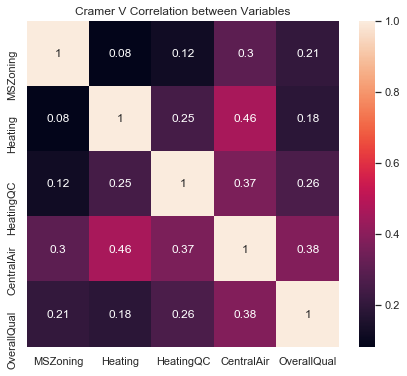

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]#Chi-square test of independence of variables in a contingency table.
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2/min((k-1),(r-1)))

def correlation_matrix(cols, data):
    corrM = np.zeros((len(cols),len(cols)))
    for col1, col2 in itertools.combinations(cols, 2):
        idx1, idx2 = cols.index(col1), cols.index(col2)
        corrM[idx1, idx2] = cramers_v(data[col1], data[col2])
        corrM[idx2, idx1] = corrM[idx1, idx2]
    for i in range(len(cols)):
        corrM[i,i]=1
    corr = pd.DataFrame(corrM, index=cols, columns=cols)
    return corr

cols = ["MSZoning", "Heating","HeatingQC","CentralAir","OverallQual"]
corr= correlation_matrix(cols, data)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

## 3- Build our model using all features 

- First convert Categorical on dummies (one-hot encoding)
- Merge continious features with dummies
- Split dataset on train and test set
- Do feature scaling
- Train model
- Tvaluate model
- Regularize model

In [32]:
data_dummies = data[cols]
for cat_col in cols :
    if cat_col != "SalePrice":
        col_one_hot = pd.get_dummies(data[cat_col], prefix=cat_col)
        data_dummies = data_dummies.drop(cat_col, axis=1)
        data_dummies = data_dummies.join(col_one_hot)

In [33]:
data_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,...,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X = data_dummies.join(data[cont_features])

In [35]:
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler_1 = StandardScaler()
scaler_1.fit(X_train)
X_train_scaled = scaler_1.transform(X_train)

regression = LinearRegression().fit(X_train, y_train)

y_pred_train = regression.predict(X_train)
print("mse sklearn : ", np.sqrt(mse(y_pred_train, y_train)))

mse sklearn :  33169.129326057395


In [36]:
y_pred_test = regression.predict(scaler_1.transform(X_test))

In [38]:
print("mse sklearn : ", np.sqrt(mse(y_pred_test, y_test)))

mse sklearn :  7044473354238404.0


### TBD - Explication Ridge regression

In [39]:
## train model using ridge regression using all variables
ridgeReg = Ridge(alpha=0.5, normalize=True) #Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train_scaled,y_train)
y_pred_ridge_ = ridgeReg.predict(X_train_scaled)
print("mse sklearn : ", np.sqrt(mse(y_pred_ridge_, y_train)))

mse sklearn :  35789.98402091744


In [40]:
y_test_pred_ridge = ridgeReg.predict(scaler_1.transform(X_test))

In [41]:
print("mse sklearn : ", np.sqrt(mse(y_test_pred_ridge, y_test)))

mse sklearn :  42537.63325640278


### TBD- explication GridSearch

In [42]:
model = Ridge()
params = {'alpha': np.logspace(-3,3,15)}
    
grid = GridSearchCV(estimator=model, cv=5, param_grid=params, return_train_score=False,
                        n_jobs=4, refit=True)
    
grid.fit(X_train_scaled, y_train)
y_pred_ridge_ = grid.predict(X_train_scaled)

In [43]:
print("mse sklearn : ", np.sqrt(mse(y_pred_ridge_, y_train)))

mse sklearn :  33246.15187434026


In [44]:
y_test_pred_ridge = grid.predict(scaler_1.transform(X_test))
print("mse sklearn : ", np.sqrt(mse(y_test_pred_ridge, y_test)))

mse sklearn :  42487.368175121395
